In [1]:
import pandas as pd # data, file I/O
import numpy as np # algebra
import matplotlib.pyplot as plt # visualise
import seaborn as sns # visualise
import warnings # who wants them..

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data = data.drop('id', axis = 1)
data['age'] = data['age']/365
data['age'] = data['age'].round(0)
data['age'] = data['age'].astype('int64')

In [7]:
data['gender'] = data['gender'].map({1: 0, 2: 1})
#o: woman 1:man

In [8]:
data['BMI'] = (data['weight']/((data['height'])**2))*10000
data['BMI'] = data['BMI'].round(1)

In [9]:
data['overweigth'] = np.where(data['BMI'] > 25.0, 1, 0)
#data['overweight_obese'] = data.apply(lambda x: 0 if data[data['BMI'] > 25.0] else 1,axis=1)

In [10]:
data['high_pressure'] = np.where(data['ap_hi'] > 139, 1, 0)

In [11]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweigth,high_pressure
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0,0,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.5,0,0
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
age              70000 non-null int64
gender           70000 non-null int64
height           70000 non-null int64
weight           70000 non-null float64
ap_hi            70000 non-null int64
ap_lo            70000 non-null int64
cholesterol      70000 non-null int64
gluc             70000 non-null int64
smoke            70000 non-null int64
alco             70000 non-null int64
active           70000 non-null int64
cardio           70000 non-null int64
BMI              70000 non-null float64
overweigth       70000 non-null int32
high_pressure    70000 non-null int32
dtypes: float64(2), int32(2), int64(11)
memory usage: 7.5 MB


In [ ]:
# gender - na binary
# height, weight - rozdelit podla gender 
# add BMI column
# distribucie dat, rozdelit podla nejekeho tresholdu e.g. zena nad 180 cm - vysoka, vaha nad napr. 80 je obezita atd.
# https://www.kaggle.com/lorenthiel/a2-demo-analyzing-cardiovascular-data
# 

In [13]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweigth,high_pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,0.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.555330,0.619543,0.277157
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.092593,0.485503,0.447598
min,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000,0.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.400000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.200000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.700000,1.000000,1.000000


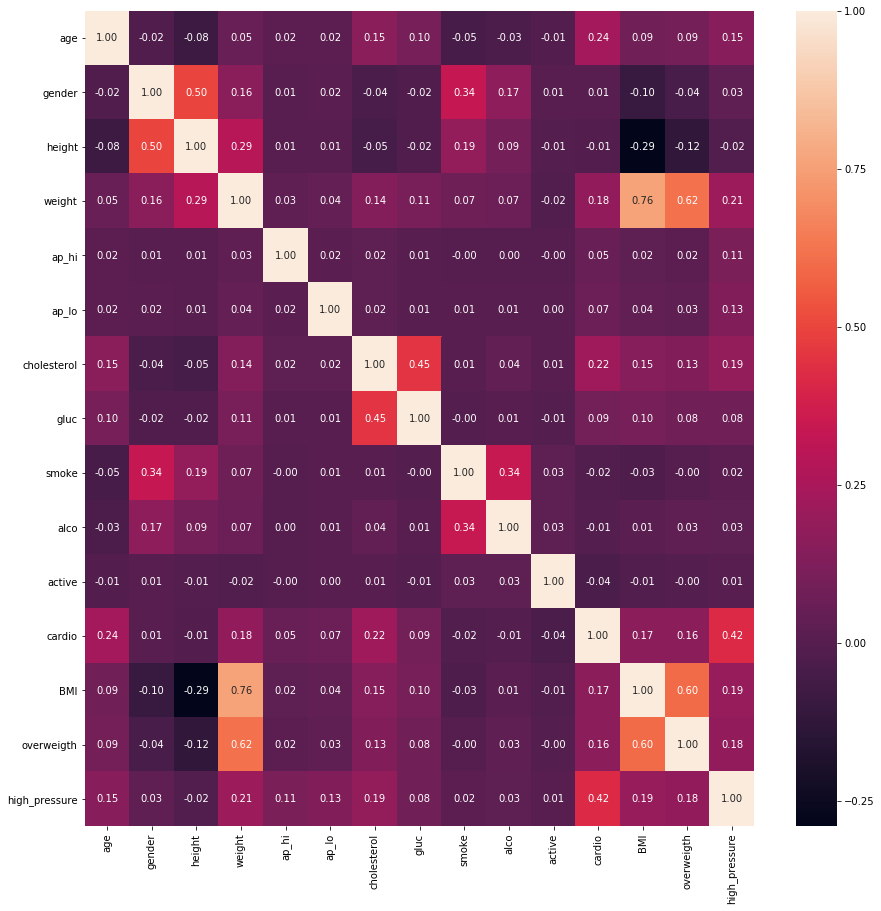

In [14]:
corr_data = data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_data, annot=True, fmt = ".2f")
plt.show()

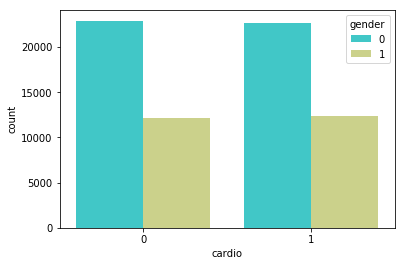

In [15]:
sns.countplot(x=data['cardio'],data=data, hue=data['gender'],palette='rocket')

In [16]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [17]:
X = data.drop('cardio', axis = 1)
y = data['cardio']

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,overweigth,high_pressure
68681,56,0,160,64.0,120,90,3,1,0,0,1,25.0,0,0
19961,62,1,167,65.0,120,80,3,3,0,0,0,23.3,0,0
11040,62,0,160,66.0,120,90,1,1,0,0,1,25.8,1,0
27673,62,0,163,55.0,125,90,3,1,0,0,1,20.7,0,0
22876,59,0,158,85.0,150,80,3,1,0,0,1,34.0,1,1


In [ ]:
# try also different test_sizes 

In [ ]:
# add feature importance to each model 
# auc krivky kreslit
# feature selection, look for what model does or needs it; information gain - v decision trees, gini koeficient len forest
# funkcia ktora zoberie zvoleny stlpec a target a vyhodi korelaciu medzi nimi, staci vediet jednu/dve 

In [ ]:
# import sklearn np.set_printoptions(suppress=True)  sklearn.feature_selection.chi2(X_train, Y_train)

In [ ]:
# pomoze hrat sa s features ked uz je aj grid search 
# polynomial features - nakombinuje komplet vsetky features sklearn.preprocessing; oplati sa na numericke  

In [ ]:
# sustredit sa na recall not accuracy, false negatives - ludia co maju chorobu a neodhalim - najdolezitejsie

## XGBoost

In [19]:
import xgboost as XGB

XGBC = XGB.XGBClassifier()

XGBC.fit(X_train,y_train)
y_pred_XGB = XGBC.predict(X_test)

In [20]:
from sklearn import metrics

accuracy = XGBC.score(X_test, y_test)
predicted = XGBC.predict(X_test)
auc = metrics.roc_auc_score(y_test.values, predicted)

print('XGBC accuracy: {}, AUC: {}'.format(accuracy, auc))

XGBC accuracy: 0.7400476190476191, AUC: 0.7401786332127085


## KNN

In [ ]:
# try different library; spark

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9, algorithm='kd_tree', weights='uniform', p=1, leaf_size=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=1,
           weights='uniform')

In [60]:
from sklearn import metrics

accuracy = knn.score(X_test, y_test)
predicted = knn.predict(X_test)
auc = metrics.roc_auc_score(y_test.values, predicted)

print('KNN accuracy: {}, AUC: {}'.format(accuracy, auc))

KNN accuracy: 0.7060714285714286, AUC: 0.7061961342147101


## Decision Tree

In [ ]:
# visualise the tree

In [ ]:
# predict_proba - aka je sanca ze hodnota je 1 alebo 0 

In [ ]:
# gradient boosted trees

In [29]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
from sklearn import metrics

accuracy_dt = dt.score(X_test, y_test)
predicted_dt = dt.predict(X_test)
auc_dt = metrics.roc_auc_score(y_test.values, predicted_dt)

print('DT accuracy: {}, AUC: {}'.format(accuracy_dt, auc_dt))

DT accuracy: 0.6289285714285714, AUC: 0.6289484197667846


Accuracy:  0.6289285714285714
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6988
           1       0.63      0.62      0.62      7012

   micro avg       0.63      0.63      0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



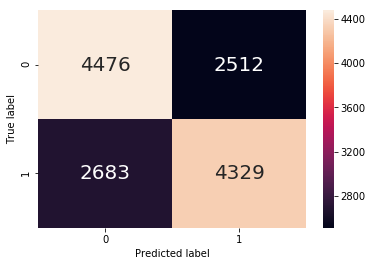

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_dt)) 
print(classification_report(y_test, predicted_dt))

sns.heatmap(confusion_matrix(y_test, predicted_dt), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [ ]:
# visualise the forest

In [ ]:
# n_estimators - 500 or 1000 should be sufficient
# start with decision trees, pozor na depth
# mensia interpretovatelnost
# decision tree moze vybrat par features ale random forest vie vyuzit aj vsetky napr 

In [ ]:
# bootstrapping - viacero modelov s trochu inymi features

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)

MemoryError: could not allocate 1572864 bytes

In [20]:
from sklearn import metrics

accuracy_rf = rf.score(X_test, y_test)
predicted_rf = rf.predict(X_test)
auc_rf = metrics.roc_auc_score(y_test.values, predicted_rf)

print('RF accuracy: {}, AUC: {}'.format(accuracy_rf, auc_rf))

RF accuracy: 0.7096428571428571, AUC: 0.7096923208793631


Accuracy:  0.7096428571428571
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     13940
           1       0.72      0.70      0.71     14060

   micro avg       0.71      0.71      0.71     28000
   macro avg       0.71      0.71      0.71     28000
weighted avg       0.71      0.71      0.71     28000



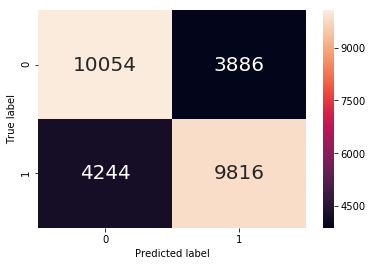

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_rf)) 
print(classification_report(y_test, predicted_rf))

sns.heatmap(confusion_matrix(y_test, predicted_rf), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# add grid search 

## SVM

In [65]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [66]:
from sklearn import metrics

accuracy_svm = svm.score(X_test, y_test)
predicted_svm = svm.predict(X_test)
auc_svm = metrics.roc_auc_score(y_test.values, predicted_svm)

print('SVM accuracy: {}, AUC: {}'.format(accuracy_svm, auc_svm))

SVM accuracy: 0.7031428571428572, AUC: 0.7031585274015236


In [ ]:
# AUC 0.50 znamena ze sa nic nenaucil

## SVM - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':('linear', 'rbf'), 
              'C':(1,0.25,0.5,0.75),
              'gamma': (1,2,3,'auto'),
              'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)}

svm = SVC()
svm_optimized = GridSearchCV(estimator=svm, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=5)
svm_optimized.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# GridSearchCV kombinuje grid search s cross-validation a vybere najlepsi model 

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn import metrics


accuracy_lr = logreg.score(X_test, y_test)
predicted_lr = logreg.predict(X_test)
auc_lr = metrics.roc_auc_score(y_test.values, predicted_lr)

print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lr, auc_lr))

Logistic regression accuracy: 0.7243333333333334, AUC: 0.7247322704560849


Accuracy:  0.7243333333333334
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     10461
           1       0.79      0.62      0.69     10539

   micro avg       0.72      0.72      0.72     21000
   macro avg       0.74      0.72      0.72     21000
weighted avg       0.74      0.72      0.72     21000



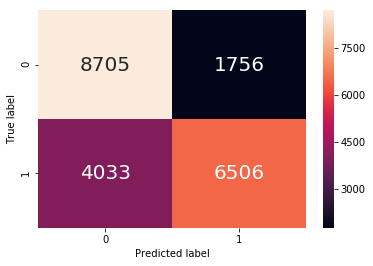

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lr)) 
print(classification_report(y_test, predicted_lr))

sns.heatmap(confusion_matrix(y_test, predicted_lr), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression - Grid Search 

In [21]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'penalty': ('l1', 'l2'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1),
    'fit_intercept': (True, False)
}

logreg = LogisticRegression(n_jobs=-1)
logreg_optimized = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=5)
logreg_optimized.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1.0, 0.75, 0.5, 0.25, 0.1), 'fit_intercept': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [22]:
from sklearn import metrics


accuracy_lro = logreg_optimized.score(X_test, y_test)
predicted_lro = logreg_optimized.predict(X_test)
auc_lro = metrics.roc_auc_score(y_test.values, predicted_lro)

print('Best score: {}, best params: {}'.format(logreg_optimized.best_score_, logreg_optimized.best_params_))
print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lro, auc_lro))

Best score: 0.7195102040816327, best params: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}
Logistic regression accuracy: 0.7243333333333334, AUC: 0.7247322704560849


## LR Standardized Dataset

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [66]:
logreg_std = LogisticRegression()
logreg_std.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
from sklearn import metrics


accuracy_lr_std = logreg_std.score(X_test_std, y_test)
predicted_lr_std = logreg_std.predict(X_test_std)
auc_lr_std = metrics.roc_auc_score(y_test.values, predicted_lr_std)

print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lr_std, auc_lr_std))

Logistic regression accuracy: 0.7241904761904762, AUC: 0.7245846357662675


Accuracy:  0.7241904761904762
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     10461
           1       0.79      0.62      0.69     10539

   micro avg       0.72      0.72      0.72     21000
   macro avg       0.74      0.72      0.72     21000
weighted avg       0.74      0.72      0.72     21000



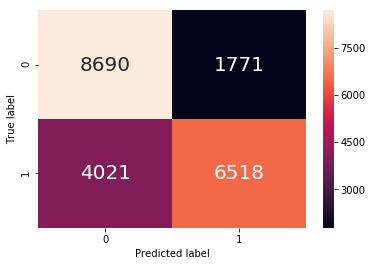

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lr_std, normalize=True)) 
print(classification_report(y_test, predicted_lr_std))

sns.heatmap(confusion_matrix(y_test, predicted_lr_std), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## LR Standardized GridSearch

In [90]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'penalty': ('l1', 'l2'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5),
    'fit_intercept': (True, False) 
}

logreg = LogisticRegression(n_jobs=-1)
logreg_optimized_std = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=5, scoring = 'recall')
logreg_optimized_std.fit(X_train_std, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   26.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5), 'fit_intercept': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

In [91]:
from sklearn import metrics


accuracy_lro_std = logreg_optimized_std.score(X_test_std, y_test)
predicted_lro_std = logreg_optimized_std.predict(X_test_std)
auc_lro_std = metrics.roc_auc_score(y_test.values, predicted_lro_std)

print('Best score: {}, best params: {}'.format(logreg_optimized_std.best_score_, logreg_optimized_std.best_params_))
print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lro_std, auc_lro_std))

Best score: 0.6081423895253681, best params: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}
Logistic regression accuracy: 0.6184647499762785, AUC: 0.7245846357662675


Accuracy:  0.7241904761904762
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     10461
           1       0.79      0.62      0.69     10539

   micro avg       0.72      0.72      0.72     21000
   macro avg       0.74      0.72      0.72     21000
weighted avg       0.74      0.72      0.72     21000



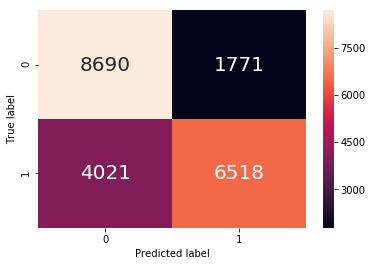

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lro_std,normalize=True)) 
print(classification_report(y_test, predicted_lro_std))

sns.heatmap(confusion_matrix(y_test, predicted_lro_std), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## LR Normalized dataset

In [86]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [87]:
logreg_mm = LogisticRegression()
logreg_mm.fit(X_train_minmax, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
from sklearn import metrics


accuracy_lr_mm = logreg_std.score(X_test_minmax, y_test)
predicted_lr_mm = logreg_std.predict(X_test_minmax)
auc_lr_mm = metrics.roc_auc_score(y_test.values, predicted_lr_mm)

print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lr_mm, auc_lr_mm))

Logistic regression accuracy: 0.7240952380952381, AUC: 0.7244932875672597


Accuracy:  0.7240952380952381
              precision    recall  f1-score   support

           0       0.68      0.83      0.75     10461
           1       0.79      0.62      0.69     10539

   micro avg       0.72      0.72      0.72     21000
   macro avg       0.74      0.72      0.72     21000
weighted avg       0.74      0.72      0.72     21000



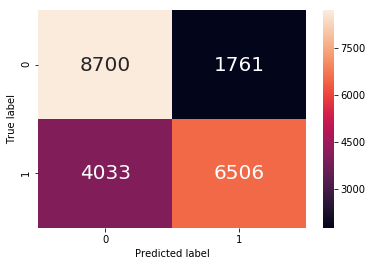

In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lr_mm, normalize=True)) 
print(classification_report(y_test, predicted_lr_mm))

sns.heatmap(confusion_matrix(y_test, predicted_lr_mm), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Linear Regression

In [ ]:
# try PCA before Lin Reg
# not ideal for binary features, not worth it prob.

In [18]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
from sklearn import metrics


accuracy_lir = linreg.score(X_test, y_test)
predicted_lir = linreg.predict(X_test)
auc_lir = metrics.roc_auc_score(y_test.values, predicted_lir)

print('Linear regression accuracy: {}, AUC: {}'.format(accuracy_lir, auc_lir))

Logistic regression accuracy: 0.12235979478266612, AUC: 0.7054126644605807


## Linear Regression - Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'copy_X': (True, False),
    'fit_intercept': (True, False),
    'normalize': (True, False)
}

linreg = LinearRegression(n_jobs=-1)
linreg_optimized = GridSearchCV(estimator=linreg, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=5)
linreg_optimized.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'copy_X': (True, False), 'fit_intercept': (True, False), 'normalize': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [27]:
from sklearn import metrics


accuracy_liro = linreg_optimized.score(X_test, y_test)
predicted_liro = linreg_optimized.predict(X_test)
auc_liro = metrics.roc_auc_score(y_test.values, predicted_liro)

print('Best score: {}, best params: {}'.format(linreg_optimized.best_score_, linreg_optimized.best_params_))
print('Linear regression accuracy: {}, AUC: {}'.format(accuracy_liro, auc_liro))

Best score: 0.11722052670245807, best params: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Linear regression accuracy: 0.12235979478266612, AUC: 0.7054126644605807


## -------------------------------------------------------------------------------------------------------------------------------

In [14]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {
    'n_neighbors': list(range(1,10)),
    'weights': ('distance', 'uniform'),
    'algorithm': ('ball_tree', 'kd_tree', 'brute'),
    'leaf_size': [10, 20, 30, 40, 50],
    'p': (1, 2)
}
knn = KNeighborsClassifier(n_jobs=-1)
knn_optimized = RandomizedSearchCV(estimator=knn, param_distributions = parameters, n_iter=100, cv=3, verbose=2,
                                   random_state=42, n_jobs=-1, scoring="accuracy")
knn_optimized.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MemoryError: 

In [31]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'n_neighbors': list(range(1,10)),
    'weights': ('distance', 'uniform'),
    'algorithm': ('ball_tree', 'kd_tree', 'brute'),
    'leaf_size': [1, 10, 30],
    'p': (1, 2)
}
knn = KNeighborsClassifier(n_jobs=-1)
knn_optimized = GridSearchCV(estimator=knn, param_grid=parameters,n_jobs=1, pre_dispatch=1,
                              refit=True, verbose=False, cv=3)
knn_optimized.fit(X_train, y_train)

MemoryError: 

In [59]:
accuracy = knn_optimized.score(X_test, y_test)
predicted = knn_optimized.predict(X_test)
auc = metrics.roc_auc_score(y_test.values, predicted)

print('Best score: {}, best params: {}'.format(knn_optimized.best_score_, knn_optimized.best_params_))
print('Optimized KNN accuracy: {}, AUC: {}'.format(accuracy, auc))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.